In [1]:
%%HTML
<style type="text/css">
table.dataframe td,table.dataframe th{
    border: 1px green solid!important;
    color: black !important;
}
</style>


### Step 1: Set up the Jupyter Notebook 

In [74]:
import pandas as pd
import numpy as np
import datetime as dt
import time as tm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Information of Data set Titled: Video Game Sales
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

There are 16,598 records. 2 records were dropped due to incomplete information.

In [75]:
Vg = pd.read_csv("vgsales.csv", parse_dates=["Year"])
Vg.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989-01-01,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006-01-01,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006-01-01,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009-01-01,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984-01-01,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [76]:
#length of dataframe
len(Vg)

16598

### Step 2: Statistical Information of data set

In [77]:
Vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          16598 non-null  int64         
 1   Name          16598 non-null  object        
 2   Platform      16598 non-null  object        
 3   Year          16327 non-null  datetime64[ns]
 4   Genre         16598 non-null  object        
 5   Publisher     16540 non-null  object        
 6   NA_Sales      16598 non-null  float64       
 7   EU_Sales      16598 non-null  float64       
 8   JP_Sales      16598 non-null  float64       
 9   Other_Sales   16598 non-null  float64       
 10  Global_Sales  16598 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [78]:
Vg.dtypes

Rank                     int64
Name                    object
Platform                object
Year            datetime64[ns]
Genre                   object
Publisher               object
NA_Sales               float64
EU_Sales               float64
JP_Sales               float64
Other_Sales            float64
Global_Sales           float64
dtype: object

In [79]:
pd.crosstab(Vg.Name,Vg.NA_Sales).head(20)

NA_Sales,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,12.78,14.03,14.59,14.97,15.75,15.85,23.20,26.93,29.08,41.49
Name,,,,,,,,,,,,,,,,,,,,,
'98 Koshien,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.hack//G.U. Vol.1//Rebirth,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.hack//G.U. Vol.2//Reminisce,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.hack//G.U. Vol.2//Reminisce (jp sales),1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.hack//G.U. Vol.3//Redemption,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.hack//Infection Part 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.hack//Link,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.hack//Mutation Part 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.hack//Outbreak Part 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
Vg.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [81]:
Vg.describe(include=object).transpose()

,count,unique,top,freq
Name,16598,11493,Need for Speed: Most Wanted,12
Platform,16598,31,DS,2163
Genre,16598,12,Action,3316
Publisher,16540,578,Electronic Arts,1351


### Step 3: Cleaning Data

In [82]:
Vg.isnull().values.any()#is there some missing values

True

In [83]:
Vg.isnull().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [84]:
Vg['Year'].isnull().sum()

271

In [13]:
print("The percentage of NAN values in the Year is {0:.2f}%".format(Vg['Year'].isnull().sum()*100/Vg.shape[0]))

The percentage of NAN values in the Year is 1.63%


In [14]:
Vg['Publisher'].isnull().sum()

58

In [15]:
print("The percentage of NAN values in the Publisher is {0:.2f}%".format(Vg['Publisher'].isnull().sum()*100/Vg.shape[0]))

The percentage of NAN values in the Publisher is 0.35%


In [16]:
#as the percentage is low then we can drop those rows
Vg.dropna(inplace=True)
Vg.reset_index(drop=True, inplace=True)
Vg

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16286,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002-01-01,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16597,Men in Black II: Alien Escape,GC,2003-01-01,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008-01-01,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16599,Know How 2,DS,2010-01-01,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [17]:
#checking if any missing values are left
Vg.isnull().any()

Rank            False
Name            False
Platform        False
Year            False
Genre           False
Publisher       False
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [18]:
#Z score scaling
col_dtypes = Vg.dtypes.tolist()
numeric_cols = [Vg.columns[idx] for idx, col_type in enumerate(col_dtypes) if col_type=='int64' or col_type=='float64']

In [19]:
Vg_numerics = Vg[numeric_cols]
Vg_numerics.head(10)

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,41.49,29.02,3.77,8.46,82.74
1,2,29.08,3.58,6.81,0.77,40.24
2,3,15.85,12.88,3.79,3.31,35.82
3,4,15.75,11.01,3.28,2.96,33.00
4,5,11.27,8.89,10.22,1.00,31.37
5,6,23.20,2.26,4.22,0.58,30.26
6,7,11.38,9.23,6.50,2.90,30.01
7,8,14.03,9.20,2.93,2.85,29.02
8,9,14.59,7.06,4.70,2.26,28.62
9,10,26.93,0.63,0.28,0.47,28.31


### Step 4:Visualizing Data

In [85]:
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler

In [86]:
scale = StandardScaler()
scaled_fitted = scale.fit_transform(Vg_numerics)
Vg_numeric_scaled_3_library = pd.DataFrame(scaled_fitted, columns=Vg_numerics.columns)

In [87]:
categorical_cols = [Vg.columns[idx] for idx, col_type in enumerate(col_dtypes) if col_type=='O']
categorical_cols

['Name', 'Platform', 'Genre', 'Publisher']

In [91]:
#one hot encoded
pd.get_dummies(Vg[categorical_cols])

,Name_'98 Koshien,Name_.hack//G.U. Vol.1//Rebirth,Name_.hack//G.U. Vol.2//Reminisce,Name_.hack//G.U. Vol.2//Reminisce (jp sales),Name_.hack//G.U. Vol.3//Redemption,Name_.hack//Infection Part 1,Name_.hack//Link,Name_.hack//Mutation Part 2,Name_.hack//Outbreak Part 3,Name_.hack//Quarantine Part 4: The Final Chapter,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
#Which game had the largest sell in Japan?
c=Vg['Name'][Vg['JP_Sales'].idxmax()]
c

'Pokemon Red/Pokemon Blue'

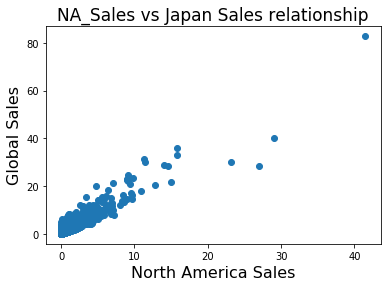

In [30]:
#Let's Visualize how North America Sales effects Global Sales
plt.scatter(Vg['NA_Sales'], Vg['Global_Sales'])
plt.title('NA_Sales vs Japan Sales relationship', fontsize=17)
plt.xlabel('North America Sales', fontsize=16)
plt.ylabel('Global Sales', fontsize=16)
plt.show()

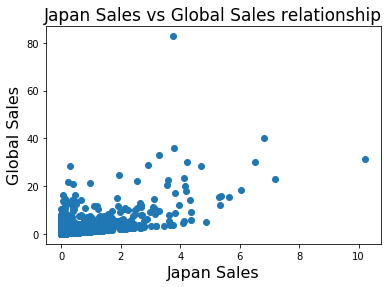

In [40]:
#Let's Visualize how Japan Sales effects Global Sales
plt.scatter(Vg['JP_Sales'], Vg['Global_Sales'])
plt.title('Japan Sales vs Global Sales relationship', fontsize=17)
plt.xlabel('Japan Sales', fontsize=16)
plt.ylabel('Global Sales', fontsize=16)
plt.show()

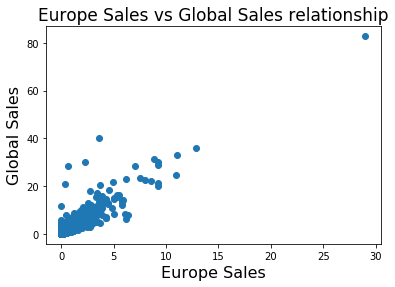

In [41]:
#Let's Visualize how Europe Sales effects Global Sales
plt.scatter(Vg['EU_Sales'], Vg['Global_Sales'])
plt.title('Europe Sales vs Global Sales relationship', fontsize=17)
plt.xlabel('Europe Sales', fontsize=16)
plt.ylabel('Global Sales', fontsize=16)
plt.show()

In [35]:
Vg[['NA_Sales', 'EU_Sales', 'JP_Sales','Global_Sales']].groupby(['NA_Sales', 'EU_Sales','JP_Sales']).mean()

Global_Sales
NA_Sales EU_Sales JP_Sales              
0.00     0.00     0.00          0.095000
                  0.01          0.010000
                  0.02          0.020065
                  0.03          0.030000
                  0.04          0.040176
...                                  ...
15.85    12.88    3.79         35.820000
23.20    2.26     4.22         30.260000
26.93    0.63     0.28         28.310000
29.08    3.58     6.81         40.240000
41.49    29.02    3.77         82.740000

[4911 rows x 1 columns]

In [29]:
#Correlation 
Vg.corr()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,-0.400315,-0.379137,-0.269323,-0.332735,-0.426975
NA_Sales,-0.400315,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,-0.379137,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,-0.269323,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,-0.332735,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,-0.426975,0.941269,0.903264,0.612774,0.747964,1.000000


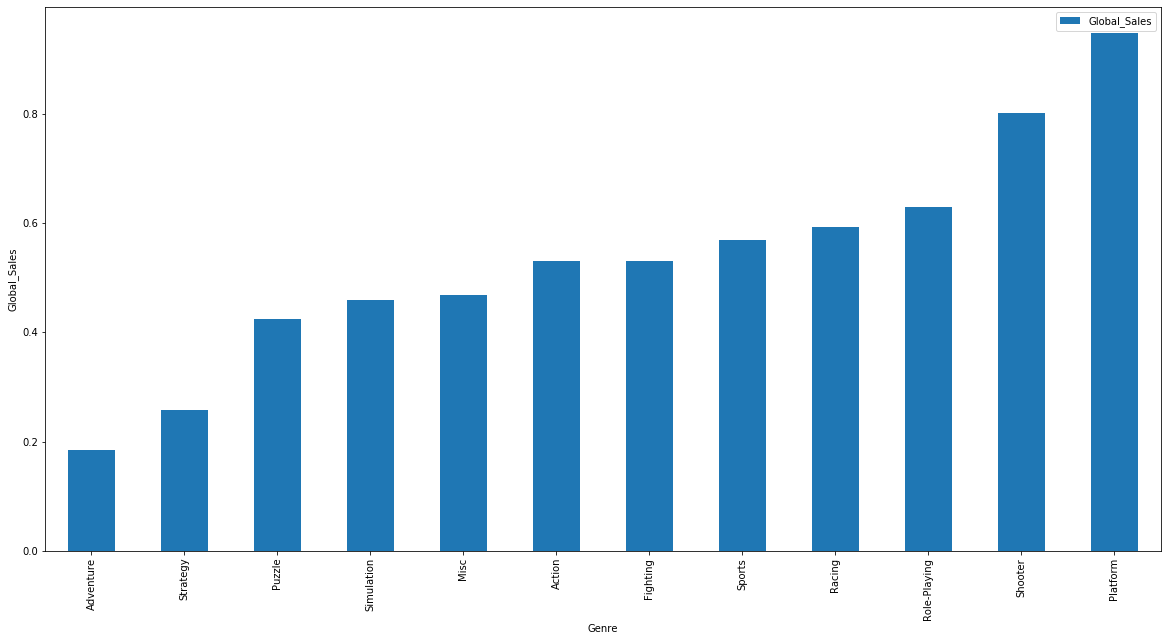

In [42]:
# visualizing the Global Sales  for different Genres
mean_price = Vg[['Genre', 'Global_Sales']].groupby('Genre').mean()
mean_price.sort_values(by='Global_Sales', ascending=True, inplace=True)
mean_price.plot(kind='bar', figsize=(20,10))
plt.ylabel('Global_Sales')
plt.show()

### Step 5:Predict a model how different Country Sales effect on Global Sales 

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [98]:
model_base = LinearRegression()

In [99]:
# make the trainable set of data
data_X = Vg[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
data_Y = Vg['Global_Sales']

In [100]:
model_base.fit(data_X, data_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
model_base.coef_

array([0.99994058, 0.99998758, 0.99988382, 0.99958749])

In [102]:
Prediction = model_base.predict(data_X)
Actual = data_Y

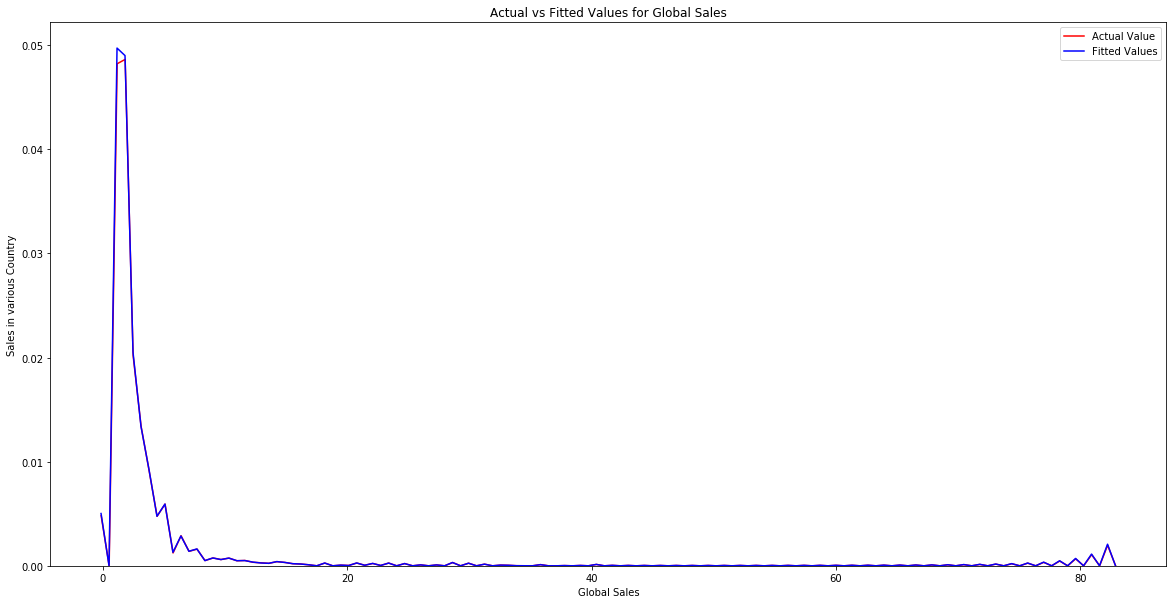

In [103]:
#comparison
plt.figure(figsize=(20, 10))


ax1 = sns.distplot(Actual, hist=False, color="r", label="Actual Value")
sns.distplot(Prediction, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Global Sales')
plt.xlabel('Global Sales')
plt.ylabel('Sales in various Country')

plt.show()
plt.close()

In [104]:
mean_squared_error(Actual, Prediction)#the lower it is, the better it is

2.7263151179008646e-05

In [105]:
r2_score(Actual, Prediction) #The closer to 1 it is the better it is

0.999988724759158